In [1]:
import os
import numpy as np

from bisect import bisect_right, bisect_left

In [2]:
class Rectangle():
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        
    def GetCentroid(self):
        return (self.x + self.width/2.0, self.y + self.height/2.0)

In [3]:
class UUIDRectangle(Rectangle):
    def __init__(self, x, y, width, height, uuid):
        super().__init__(x, y, width, height)
        self.assigned_to_set = False
        self.uuid = uuid

In [4]:
def CheckIntersectionOfRectangle(a, b):
    # Check if rectangles are either side of eachother
    if (a.x >= b.x + b.width or b.x >= a.x + a.width):
        return False;
    
    # Check if rectangles are above or below eachother
    if (a.y >= b.y + b.height or b.y >= a.y + a.height):
        return False;
    
    return True

In [5]:
def CheckCandidateIntersectsWithSetMembers(candidate, maximal_set):    
    for rectangle in maximal_set:
        if not CheckIntersectionOfRectangle(candidate, rectangle):
            return False
        
    return True

In [6]:
# Unit test x axis
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(0, 1, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == True

# Unit test x axis
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(0, 30, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == False

In [7]:
# Unit test y axis
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(1, 0, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == True

# Unit test y axis
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(30, 0, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == False

In [8]:
# Unit test same lower left corner point
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(0, 0, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == True

# Unit test lower left corner and upper right corner
rectangle_a = Rectangle(0, 0, 5, 5)
rectangle_b = Rectangle(5, 5, 5, 5)
assert CheckIntersectionOfRectangle(rectangle_a, rectangle_b) == False

In [9]:
def PrintMaximalSet(maximal_set):
    for i, rectangle in enumerate(maximal_set):
        if i < len(maximal_set) - 1:
            print("{}, ".format(rectangle.uuid), end = '')
        else: 
            print("{}".format(rectangle.uuid), end = '')

In [10]:
def PrintMaximalSets(maximal_sets):
    for maximal_set in sorted(maximal_sets, key=len, reverse=True):
        PrintMaximalSet(maximal_set)
        print('')

In [95]:
def FindMaximalSetsFromRectangles(rectangles):
    maximal_sets = []
    
    for rectangle in rectangles:
        if rectangle.assigned_to_set: continue

        single_maximal_set = []
        single_maximal_set.append(rectangle)
        rectangle.assigned_to_set = True

        for candidate in rectangles:
            if candidate.uuid == rectangle.uuid: continue
            if CheckIntersectionOfRectangle(rectangle, candidate) \
                and CheckCandidateIntersectsWithSetMembers(candidate, single_maximal_set):
                single_maximal_set.append(candidate)
                candidate.assigned_to_set = True
        maximal_sets.append(single_maximal_set)
    
    return maximal_sets

In [96]:
rectangle_1 = UUIDRectangle(1, 1, 5, 5, 1)
rectangle_2 = UUIDRectangle(4, 4, 3, 3, 2)
rectangle_3 = UUIDRectangle(6, 1, 1, 1, 3)
rectangle_4 = UUIDRectangle(2, 2, 3, 3, 4)
rectangle_5 = UUIDRectangle(1, 4, 1, 3, 5)

rectangles = [rectangle_1, rectangle_2, rectangle_3, rectangle_4, rectangle_5]

import time

t0 = time.time()
maximal_sets = FindMaximalSetsFromRectangles(rectangles)
t1 = time.time()
print(t1-t0)
            
PrintMaximalSets(maximal_sets)

8.7738037109375e-05
1, 2, 4
5, 1
3


In [13]:
def CreateRectanglesFromData():
    rectangles = []
    data = np.loadtxt(os.getcwd() + '/rectangles.txt')

    for i in range(0, data.shape[0]):
        rectangle = UUIDRectangle(data[i,0], data[i,0], data[i,0], data[i,0], i)
        rectangles.append(rectangle)
    
    return rectangles

In [22]:
def CreateSetOfRectangles(rectangles):
    rectangle_set = set()
    
    for i, r in enumerate(rectangles):
        rectangle_set.add(r)
        
    return rectangle_set

In [83]:
d = np.logspace(0.1, 1.5, num=20)

In [90]:
a = np.logspace(0.1, 2.2, num=20)**2

In [91]:
b = 3**(d/3)

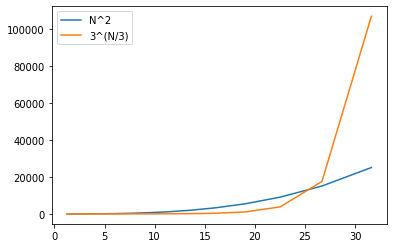

In [92]:
import matplotlib.pyplot as plt
plt.plot(d, a, label="N^2")
plt.plot(d, b, label="3^(N/3)")
plt.legend()
plt.show()